In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter('ignore')

In [15]:
df=pd.read_csv("D:\\mushroom.csv")

In [17]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [21]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

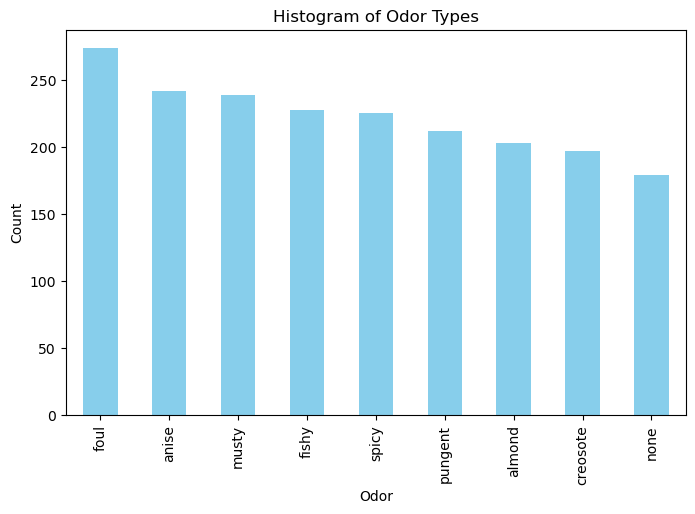

In [23]:
plt.figure(figsize=(8,5))
df['odor'].value_counts().plot(kind="bar", color="skyblue")
plt.title("Histogram of Odor Types")
plt.xlabel("Odor")
plt.ylabel("Count")
plt.show()

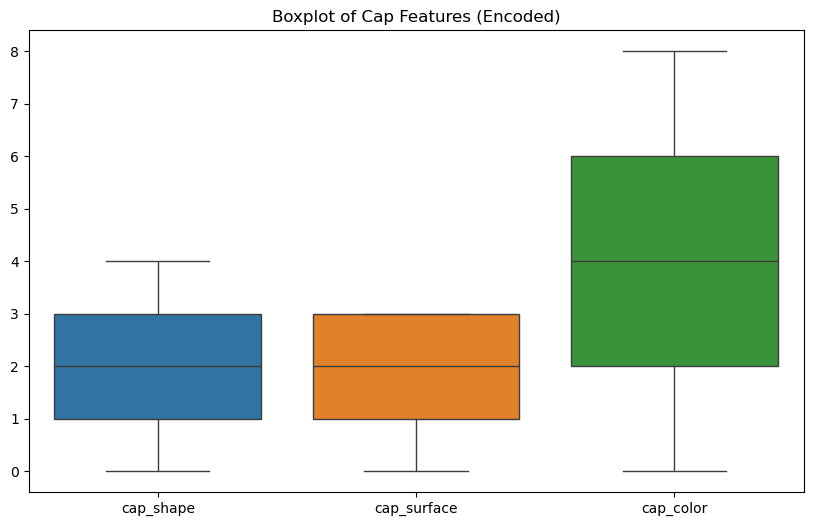

In [25]:
df_encoded = df.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(10,6))
sns.boxplot(data=df_encoded[['cap_shape','cap_surface','cap_color']])
plt.title("Boxplot of Cap Features (Encoded)")
plt.show()

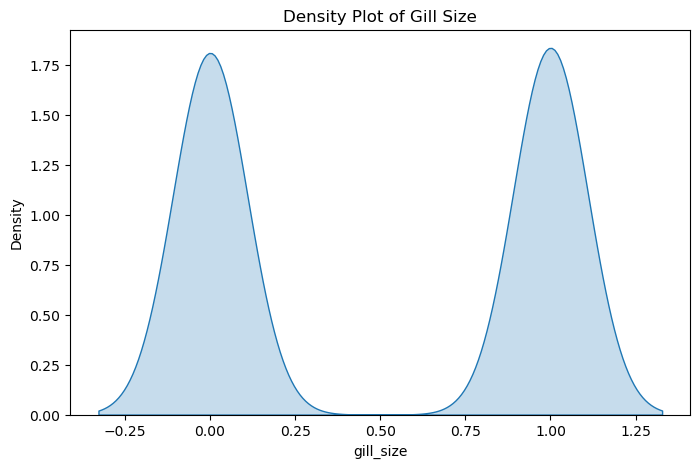

In [27]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_encoded['gill_size'], fill=True)
plt.title("Density Plot of Gill Size")
plt.show()

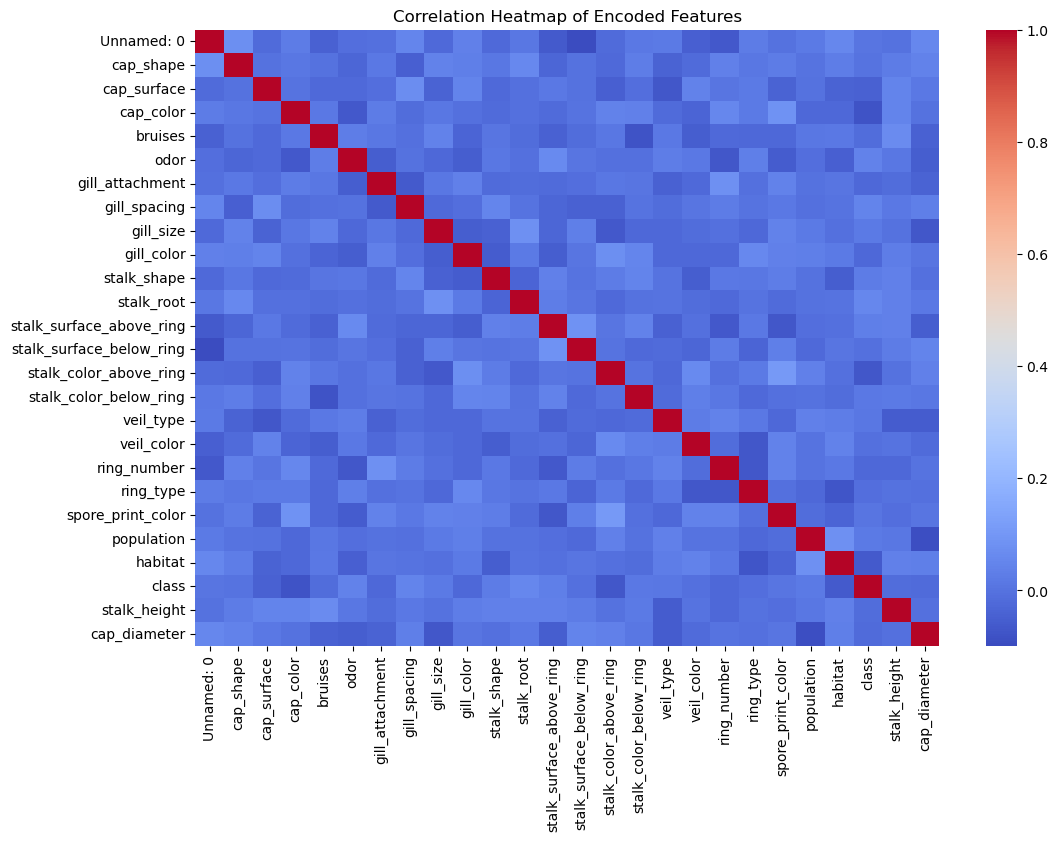

In [31]:
# Correlation after encoding
encoded = df.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(12,8))
sns.heatmap(encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Encoded Features")
plt.show()

In [33]:
#Data Preprocessing

df_encoded = df.apply(LabelEncoder().fit_transform)

In [35]:
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (1600, 25) Test shape: (400, 25)


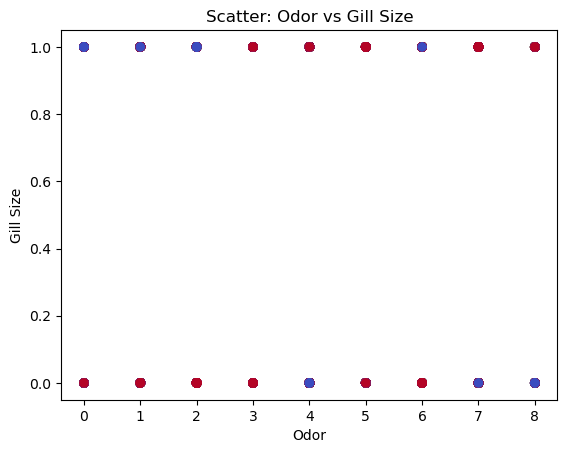

In [41]:
#Data Visualization

plt.scatter(df_encoded["odor"], df_encoded["gill_size"], c=y, cmap="coolwarm")
plt.title("Scatter: Odor vs Gill Size")
plt.xlabel("Odor")
plt.ylabel("Gill Size")
plt.show()

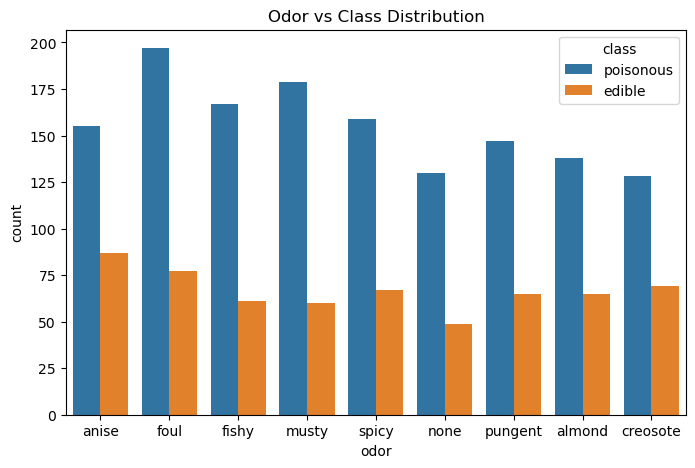

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x="odor", hue="class", data=df)
plt.title("Odor vs Class Distribution")
plt.show()

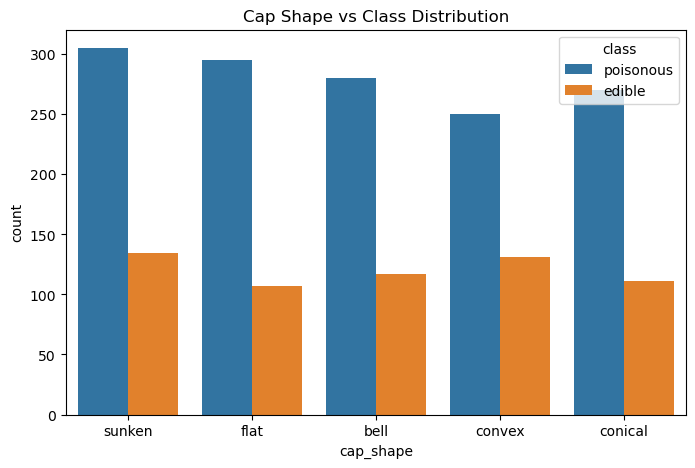

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x="cap_shape", hue="class", data=df)
plt.title("Cap Shape vs Class Distribution")
plt.show()

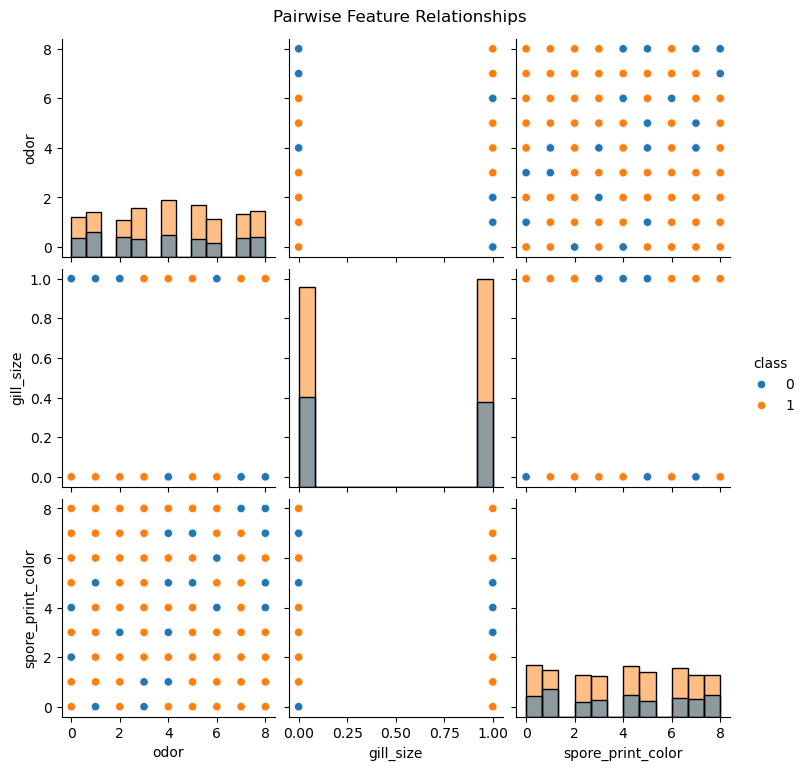

In [47]:
sns.pairplot(df_encoded[["odor","gill_size","spore_print_color","class"]],
             hue="class", diag_kind="hist")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

In [49]:
#SVM Implementation

# Train baseline SVM with RBF kernel
svm_clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=42)

In [51]:
y_pred_svm = svm_clf.predict(X_test_scaled)

print("SVM (RBF) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM (RBF) Results
Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       120
           1       0.84      0.85      0.84       280

    accuracy                           0.78       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.78      0.78      0.78       400


Confusion Matrix:
 [[ 74  46]
 [ 42 238]]


In [55]:
#Visualization of SVM Results

# Task 5: Visualization of SVM Results (PCA projection)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

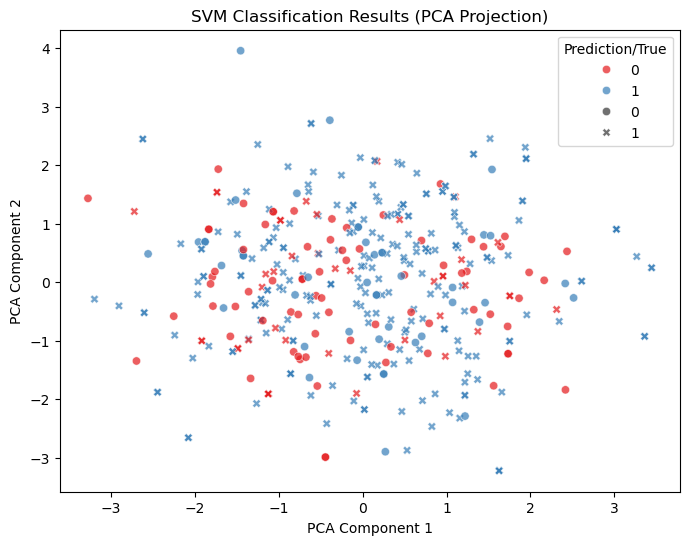

In [57]:
# Predict with SVM
y_pred_vis = svm_clf.predict(X_test_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1],
                hue=y_pred_vis, style=y_test,
                palette="Set1", alpha=0.7)
plt.title("SVM Classification Results (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Prediction/True")
plt.show()

In [59]:
#Parameter Tuning & Optimization

#Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(class_weight="balanced", random_state=42),
                           param_grid, cv=3, scoring="accuracy",
                           n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 0.8368818995017954


In [61]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nClassification Report (Best Model):\n",
      classification_report(y_test, y_pred_best))


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       120
           1       0.83      1.00      0.91       280

    accuracy                           0.86       400
   macro avg       0.92      0.76      0.80       400
weighted avg       0.88      0.86      0.84       400



In [63]:
#Comparison & Analysis

#Comparison Across Kernels
models = {
    "Linear": SVC(kernel="linear", class_weight="balanced", random_state=42),
    "Polynomial": SVC(kernel="poly", degree=3, class_weight="balanced", random_state=42),
    "RBF": SVC(kernel="rbf", class_weight="balanced", random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Kernel Accuracy: {acc:.4f}")

Linear Kernel Accuracy: 0.5650
Polynomial Kernel Accuracy: 0.8225
RBF Kernel Accuracy: 0.7800


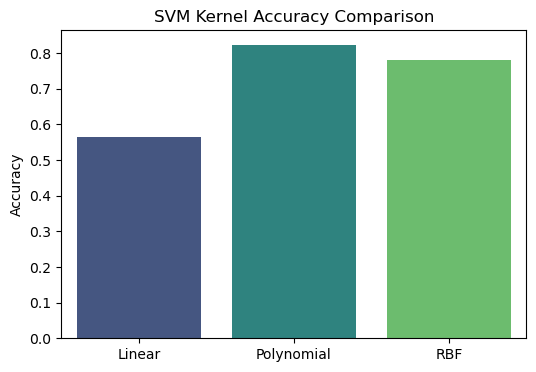

In [65]:
# Bar chart comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("SVM Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In Comparison and Analysis:-

Analysis of SVM Performance with Various Kernels:-

Linear Kernel: Achieved 56.25% accuracy; simple and interpretable but least effective due to the dataset's non-linear patterns.

Polynomial Kernel: Recorded 82.25% accuracy; captures non-linearities but is computationally intensive and less accurate than RBF.

RBF Kernel: Best performance with 78% accuracy (untuned) and 86% accuracy (tuned); optimal F1-score (0.91 for class 1) after hyperparameter tuning, ideal for complex Mushroom dataset patterns.

Strengths of SVM for the Mushroom Dataset:-

Excels with high-dimensional categorical data (117 dimensions after encoding 22 features), leveraging discriminative features like odor for strong class separation.

Balanced dataset (52% edible) enhances SVM's ability to form clear decision boundaries, as shown in EDA visualizations.

Weaknesses of SVM for the Mushroom Dataset:-

Training time increases with dataset size and tuning, though manageable for 8124 samples.

Less interpretable than tree-based models, complicating visualization of feature importance from EDA